Descriptive statistics

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.manifold import TSNE
import plotly.express as px
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud


Unique topics:
['assicurazione contro i danni' 'responsabilita contrattuale'
 'assicurazione obbligatoria rca' 'responsabilita civile dei magistrati'
 'responsabilita dei genitori' 'responsabilita extracontrattuale'
 'danno da svalutazione monetaria' 'danno da immissioni'
 'responsabilita dei padroni e committenti' 'danno da reato'
 'class action azione di classe' 'danni punitivi'
 'danno da perdita di chance' 'danno erariale' 'ingiusta detenzione'
 'responsabilita per danni da circolazione stradale' 'danno ai veicoli'
 'contratto di assicurazione' 'responsabilita professionale'
 'responsabilita medica' 'danno biologico' 'danno esistenziale'
 'danno morale' 'danno da vacanza rovinata' 'danno da morte dei congiunti'
 'danno non patrimoniale' 'danno patrimoniale' 'responsabilita della pa'
 'lite temeraria' 'danno alla persona'
 'responsabilita del produttore danno da prodotto difettoso'
 'responsabilita per danno da cose in custodia'
 'passeggero terzo trasportato terzi trasportati'
 'da

c:\Users\gaiac\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\gaiac\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



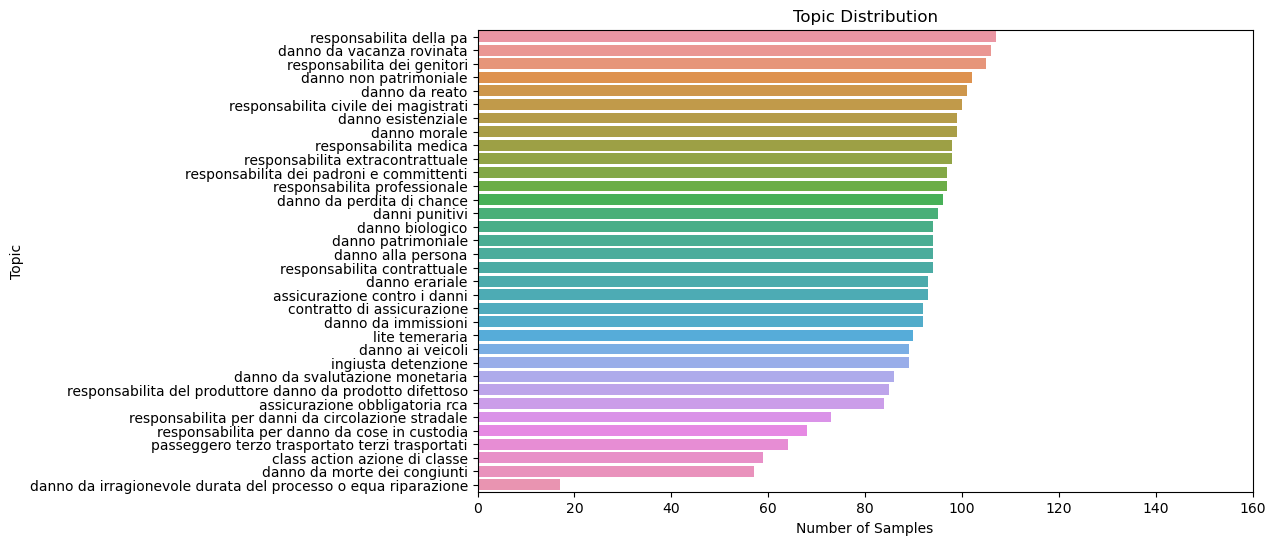

c:\Users\gaiac\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\gaiac\AppData\Local\Temp\ipykernel_24096\3661826424.py:69: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.

c:\Users\gaiac\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



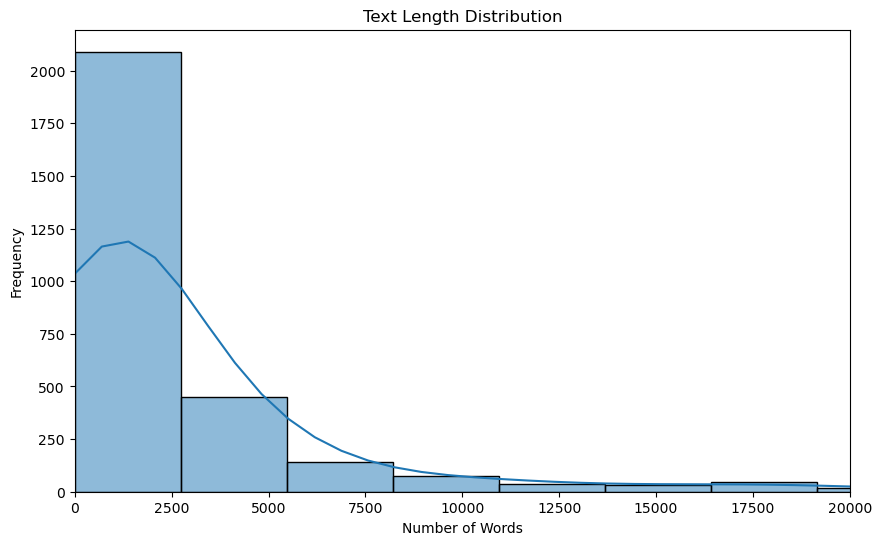

In [34]:

# Load the cleaned data
data = pd.read_csv('SpecialisticMonotopic_cleaned_LSTM.csv')

# Basic dataset overview
total_samples = len(data)
num_classes = data['topic'].nunique()

# Class distribution
class_distribution = data['topic'].value_counts()
class_proportions = data['topic'].value_counts(normalize=True) * 100

# Text length statistics
text_lengths = data['text'].apply(lambda x: len(x.split()))
avg_text_length = text_lengths.mean()
median_text_length = text_lengths.median()
min_text_length = text_lengths.min()
max_text_length = text_lengths.max()
std_text_length = text_lengths.std()

# Vocabulary size
all_words = ' '.join(data['text']).split()
vocab_size = len(set(all_words))

# Top 10 most frequent words
word_counts = Counter(all_words)
most_common_words = word_counts.most_common(10)

# Balance ratio
balance_ratio = class_distribution.max() / class_distribution.min()

# Get unique topics
unique_topics = data['topic'].unique()

# Print unique topics
print("Unique topics:")
print(unique_topics)

# Optionally, you can also get the number of unique topics
num_unique_topics = len(unique_topics)
print(f"\nNumber of unique topics: {num_unique_topics}")

# Display statistics
print(f"Total number of samples: {total_samples}")
print(f"Number of classes: {num_classes}")
print("\nClass distribution:")
print(class_distribution)
print("\nClass proportions (%):")
print(class_proportions)
print(f"\nAverage text length: {avg_text_length:.2f} words")
print(f"Median text length: {median_text_length} words")
print(f"Text length (min/max/std): {min_text_length}/{max_text_length}/{std_text_length:.2f} words")
print(f"\nTotal vocabulary size: {vocab_size}")
print("\nTop 10 most frequent words:")
for word, freq in most_common_words:
    print(f"{word}: {freq}")
print(f"\nBalance ratio: {balance_ratio:.2f}")

# Visualize class distribution
plt.figure(figsize=(10, 6))
sns.countplot(y='topic', data=data, order=class_distribution.index)
plt.title('Topic Distribution')
plt.xlabel('Number of Samples')
plt.ylabel('Topic')
plt.xlim(0, 160)  # Cap the x-axis at 40,000
plt.show()

# Visualize text length distribution
plt.figure(figsize=(10, 6))
sns.histplot(text_lengths, bins=50, kde=True,palette='tab10')
plt.title('Text Length Distribution')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.xlim(0, 20000)  # Cap the x-axis at 40,000
plt.show()

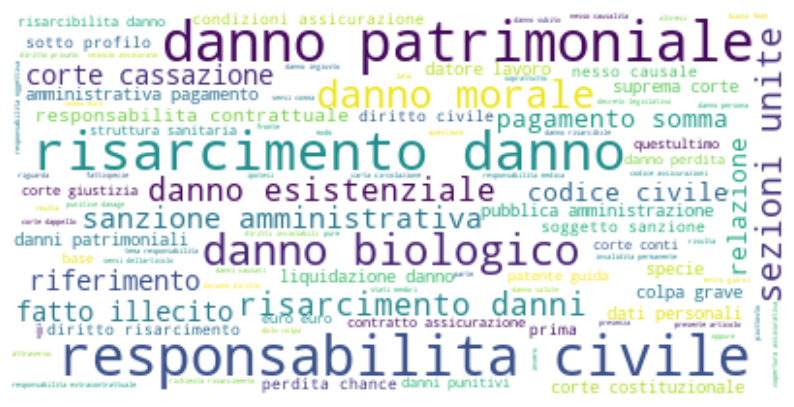

In [2]:

# Join the different processed titles together.
long_string = ','.join(list(data['text'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [35]:
# TSNE Plot
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf_vectorizer.fit_transform(data['text'])

# Apply t-SNE transformation
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_tfidf.toarray())

# Create a DataFrame for the t-SNE results
tsne_df = pd.DataFrame(X_tsne, columns=['TSNE1', 'TSNE2'])
tsne_df['topic'] = data['topic']

# Create a scatter plot with Plotly
fig = px.scatter(tsne_df, x='TSNE1', y='TSNE2', color='topic',
                 title='TSNE plot of TF-IDF features',
                 labels={'TSNE1': 'TSNE Component 1', 'TSNE2': 'TSNE Component 2'})

fig.update_traces(marker=dict(size=10))  # Adjust the size value as needed
fig.update_layout(
    legend=dict(
        title='Topic',
        itemsizing='constant'
    ),
    height=900,
    width=2000 # Adjust the height as needed
)
# Show the plot
fig.show()

In [36]:
# Using the topics you provided earlier

# Direct replacement of topics with macro topics
data['topic'] = data['topic'].replace({
    'assicurazione contro i danni': 'Assicurazione',
    'assicurazione obbligatoria rca': 'Assicurazione',
    'contratto di assicurazione': 'Assicurazione',
    'class action azione di classe': 'Procedimenti Legali',
    'danno da irragionevole durata del processo o equa riparazione': 'Procedimenti Legali',
    'lite temeraria': 'Procedimenti Legali',
    'danni punitivi': 'Danni Specifici',
    'danno biologico': 'Danni Specifici',
    'danno erariale': 'Danni Specifici',
    'danno esistenziale': 'Danni Specifici',
    'danno da immissioni': 'Danni Specifici',
    'danno morale': 'Danni Specifici',
    'danno da morte dei congiunti': 'Danni Specifici',
    'danno patrimoniale': 'Danni Specifici',
    'danno da perdita di chance': 'Danni Specifici',
    'danno alla persona': 'Danni Specifici',
    'danno da reato': 'Danni Specifici',
    'danno da svalutazione monetaria': 'Danni Specifici',
    'danno da vacanza rovinata': 'Danni Specifici',
    'danno ai veicoli': 'Danni Specifici',
    'danno non patrimoniale': 'Danni Specifici',
    'ingiusta detenzione': 'Violazioni Diritti Personali',
    'passeggero terzo trasportato terzi trasportati': 'Violazioni Diritti Personali',
    'responsabilita contrattuale': 'Responsabilità',
    'responsabilita civile dei magistrati': 'Responsabilità',
    'responsabilita dei genitori': 'Responsabilità',
    'responsabilita extracontrattuale': 'Responsabilità',
    'responsabilita dei padroni e committenti': 'Responsabilità',
    'responsabilita per danni da circolazione stradale': 'Responsabilità',
    'responsabilita professionale': 'Responsabilità',
    'responsabilita medica': 'Responsabilità',
    'responsabilita della pa': 'Responsabilità',
    'responsabilita del produttore danno da prodotto difettoso': 'Responsabilità',
    'responsabilita per danno da cose in custodia': 'Responsabilità'
})

print("Topic replacement completed.")
print(data)

# Distribution of macro topics
print("\nDistribution of macro topics:")
print(data['topic'].value_counts())

# Check for any unchanged topics
print("\nUnchanged topics:")
print(data[~data['topic'].isin(['Assicurazione', 'Procedimenti Legali', 'Danni Specifici', 'Violazioni Diritti Personali', 'Responsabilità'])]['topic'].unique())

Topic replacement completed.
                topic                                               text
0       Assicurazione  microsoft word cassazione civile  cassazione c...
1       Assicurazione  assicurazioni danni persona assicurazioni dann...
2       Assicurazione  nozione quadro normativo principio indennitari...
3      Responsabilità  bisogno avvocato esperto scrivici analizzeremo...
4      Responsabilità  disciplinata dallarticolo codice civile risarc...
...               ...                                                ...
3002   Responsabilità  articoli concorsi abilitazioni editoria profes...
3003   Responsabilità  magistratura indipendente sito necessita brows...
3004   Responsabilità  utilizziamo cookie fornire funzionalita social...
3005  Danni Specifici  responsabilita cose custodia sinistro stradale...
3006  Danni Specifici  cose risarcimento risarcimento ristoro compens...

[3007 rows x 2 columns]

Distribution of macro topics:
topic
Danni Specifici                 1

In [37]:

# TSNE Plot
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf_vectorizer.fit_transform(data['text'])

# Apply t-SNE transformation
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_tfidf.toarray())

# Create a DataFrame for the t-SNE results
tsne_df = pd.DataFrame(X_tsne, columns=['TSNE1', 'TSNE2'])
tsne_df['topic'] = data['topic']

# Create a scatter plot with Plotly
fig2 = px.scatter(tsne_df, x='TSNE1', y='TSNE2', color='topic',
                 title='TSNE plot of TF-IDF features',
                 labels={'TSNE1': 'TSNE Component 1', 'TSNE2': 'TSNE Component 2'})

fig2.update_traces(marker=dict(size=10))  # Adjust the size value as needed

# Update layout to show legend and adjust height
fig2.update_layout(
    legend=dict(
        title='Topic',
        itemsizing='constant'
    ),
    height=900,
    width=1200 # Adjust the height as needed
)
# Update layout to show a larger legend in the top right corner and adjust height
fig2.update_layout(
    legend=dict(
        title=dict(text='Topic', font=dict(size=20)),  # Increase title font size
        font=dict(size=16),  # Increase legend item font size
        yanchor="top",
        y=0.99,
        xanchor="right",
        x=0.99
    ),
    height=900,  # Adjust the height as needed
    title=dict(font=dict(size=24)),  # Increase title font size
    xaxis_title=dict(font=dict(size=25)),  # Increase x-axis label font size
    yaxis_title=dict(font=dict(size=25))  # Increase y-axis label font size
)

# Show the plot
fig2.show()